Importing the Dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [5]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [6]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [8]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

EDA

C:\Users\snehp\AppData\Local\Temp\ipykernel_27740\792071551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='Gender', palette='pastel')


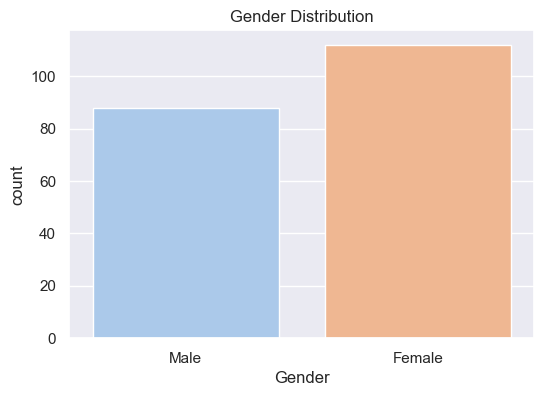

In [17]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=customer_data, x='Gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

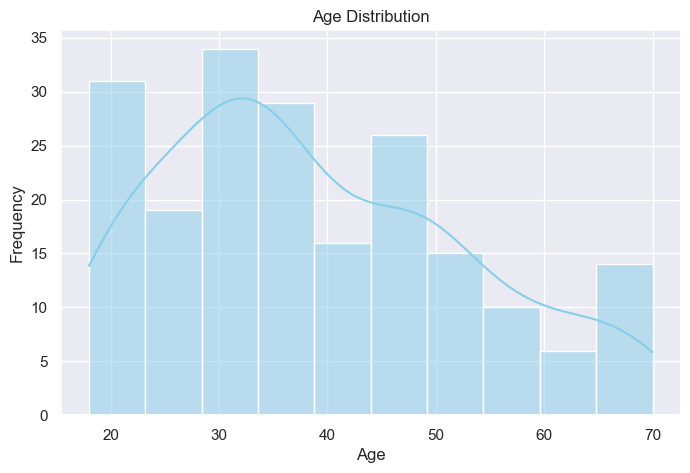

In [18]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(customer_data['Age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

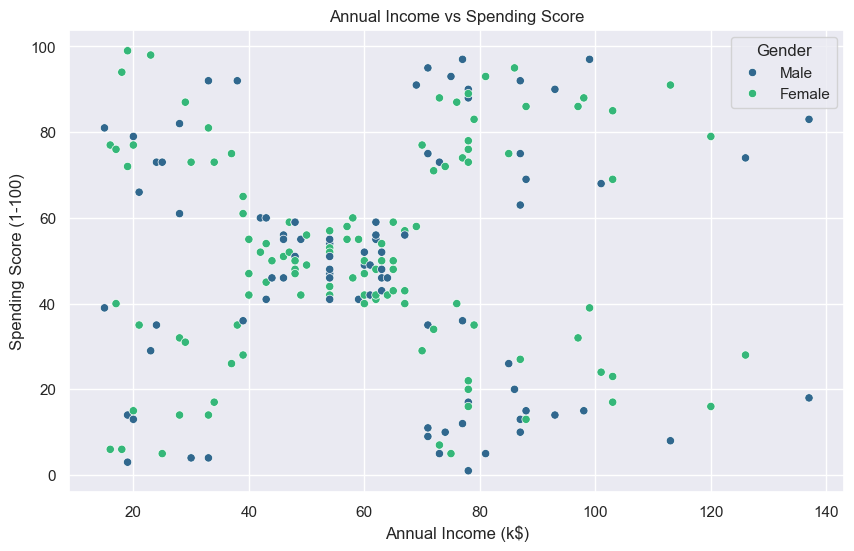

In [19]:
# Annual Income vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='viridis')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

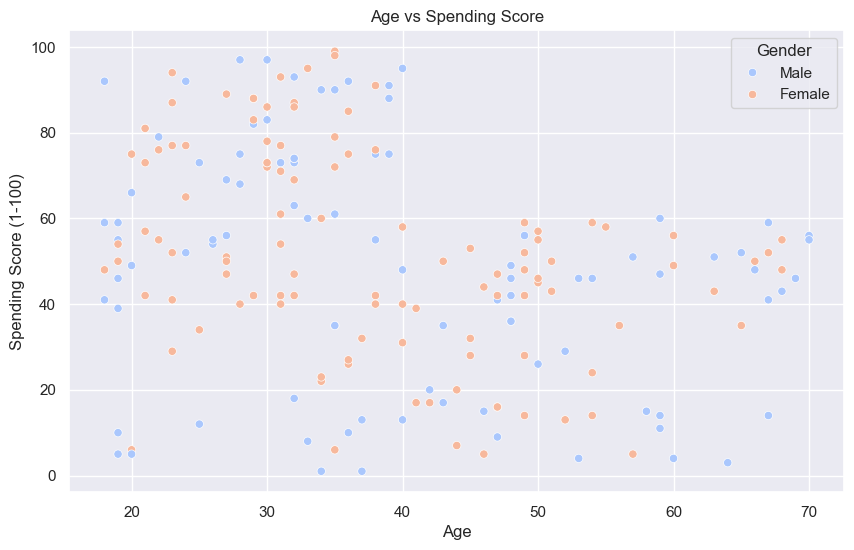

In [21]:
# Age vs Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Age', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

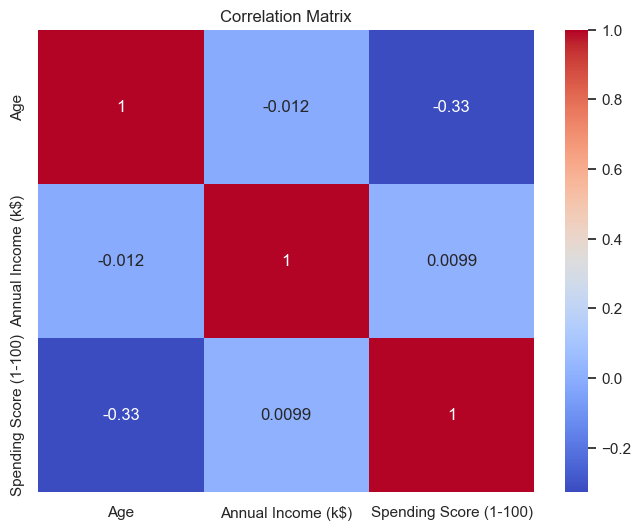

In [22]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\snehp\AppData\Local\Temp\ipykernel_27740\944787238.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='Income Group', y='Spending Score (1-100)', palette='coolwarm')


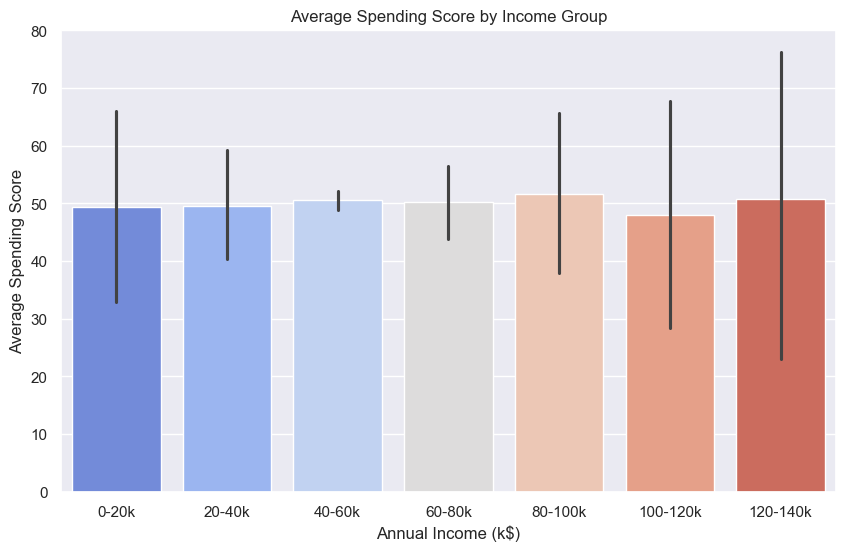

In [23]:
# Create income bins
bins = [0, 20, 40, 60, 80, 100, 120, 140]
labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-120k', '120-140k']
customer_data['Income Group'] = pd.cut(customer_data['Annual Income (k$)'], bins=bins, labels=labels)

# Average Spending Score by Income Group
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_data, x='Income Group', y='Spending Score (1-100)', palette='coolwarm')
plt.title('Average Spending Score by Income Group')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Average Spending Score')
plt.show()

C:\Users\snehp\AppData\Local\Temp\ipykernel_27740\1134540543.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_data, x='Age Group', y='Spending Score (1-100)', palette='magma')


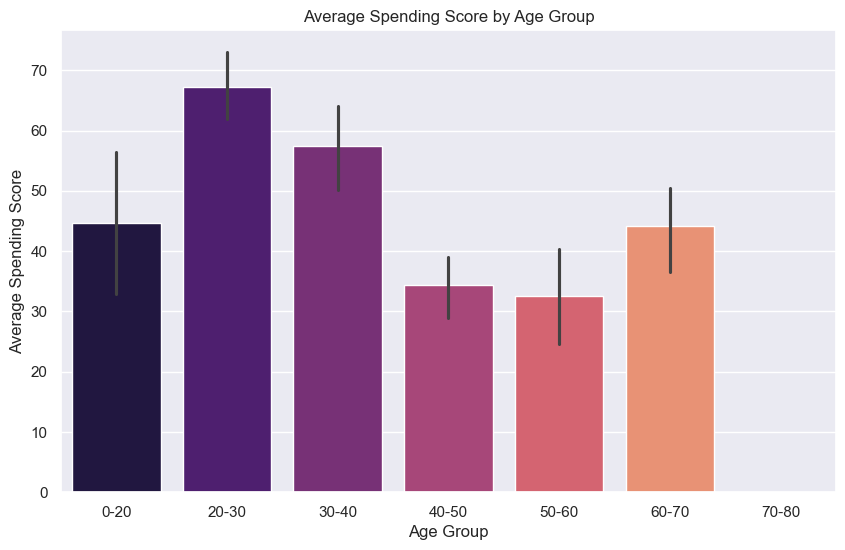

In [27]:
# Create age bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
customer_data['Age Group'] = pd.cut(customer_data['Age'], bins=age_bins, labels=age_labels)

# Average Spending Score by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(data=customer_data, x='Age Group', y='Spending Score (1-100)', palette='magma')
plt.title('Average Spending Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending Score')
plt.show()


Choosing the Annual Income Column & Spending Score column

In [10]:
X = customer_data.iloc[:,[3,4]].values

In [11]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [12]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

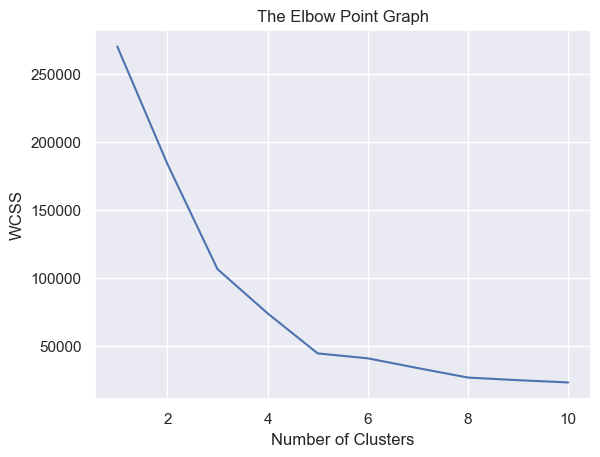

In [13]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

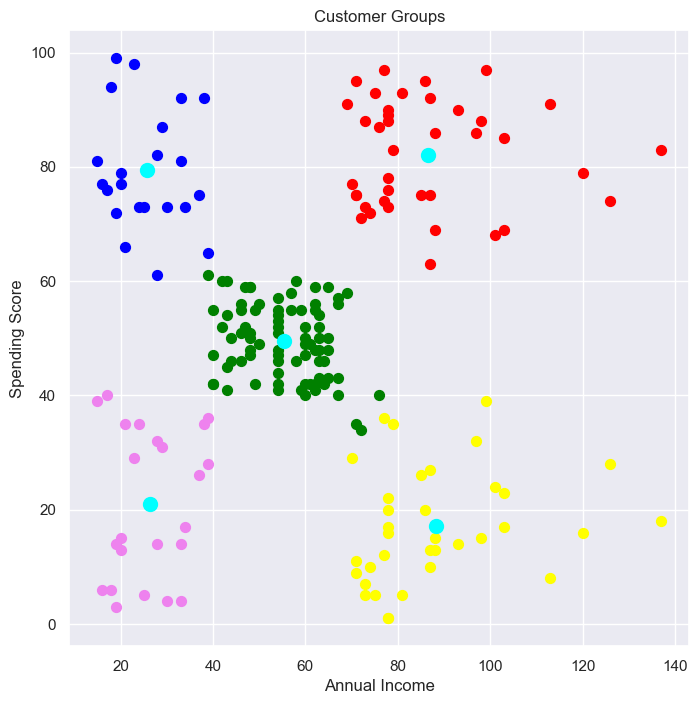

In [15]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Principal Component Analysis (PCA)

## Importing the libraries

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Select features for dimensionality reduction

In [31]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = customer_data[features]

## Standardize the data

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Apply PCA

In [33]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

## Create a DataFrame with the PCA components

In [34]:
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

## Scatter plot of the PCA components

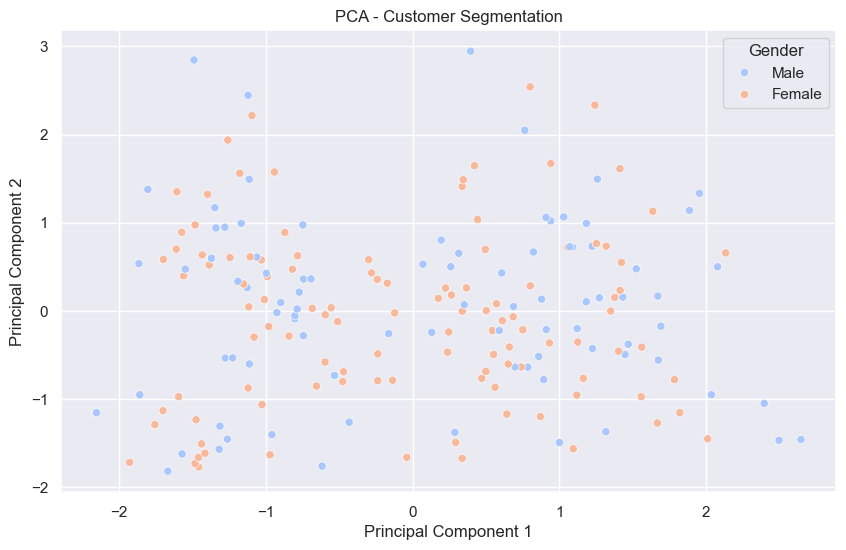

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue=customer_data['Gender'], palette='coolwarm')
plt.title('PCA - Customer Segmentation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Gender')
plt.show()

# Hierarchical Clustering

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

## Perform hierarchical clustering

In [38]:
linked = linkage(X_scaled, method='ward')

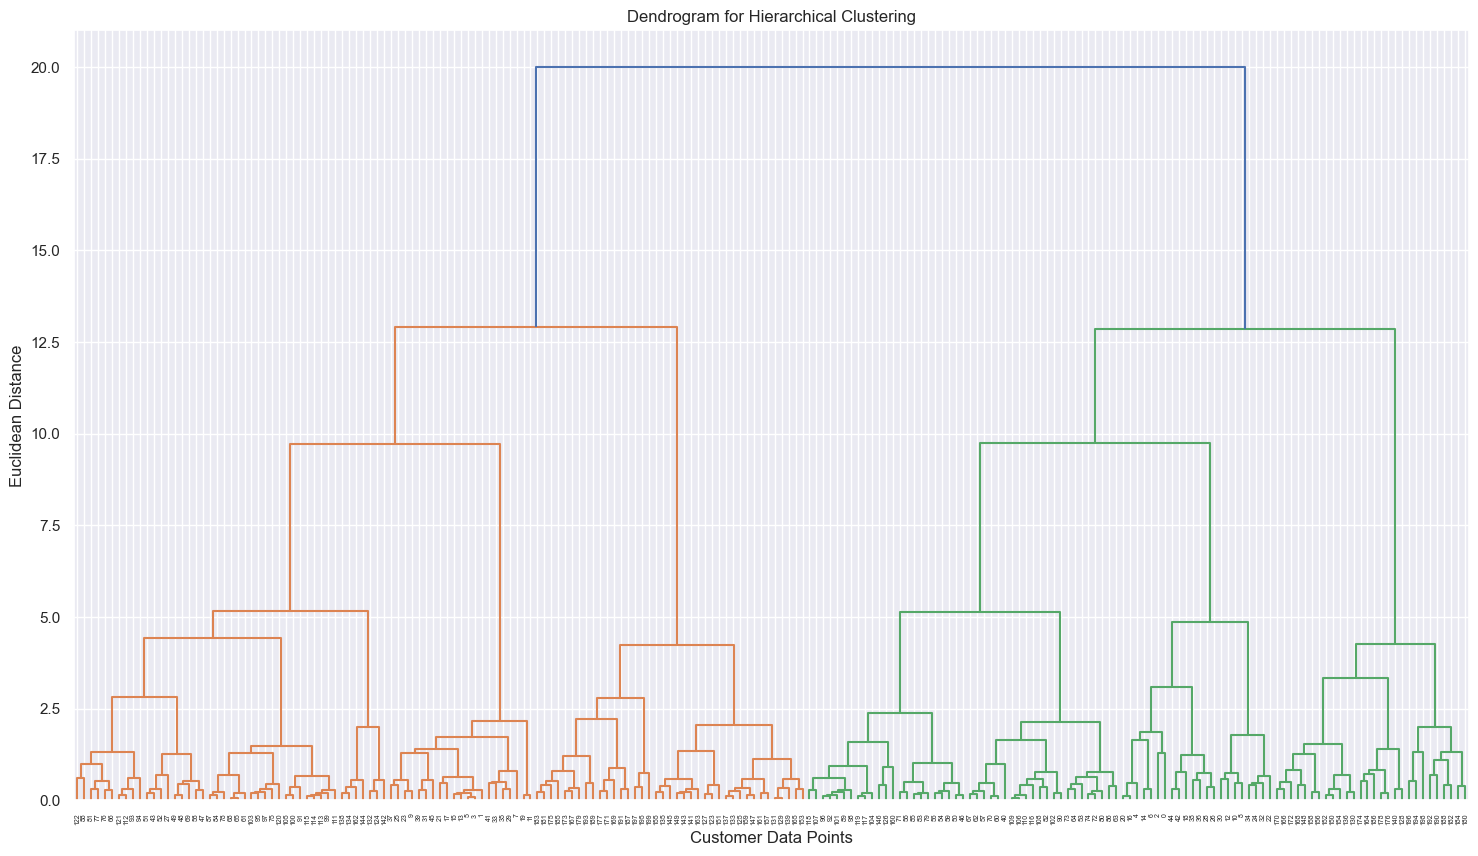

In [42]:
# Plot the dendrogram
plt.figure(figsize=(18, 10))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customer Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# DBSCAN Clustering

In [43]:
from sklearn.cluster import DBSCAN

## Apply DBSCAN

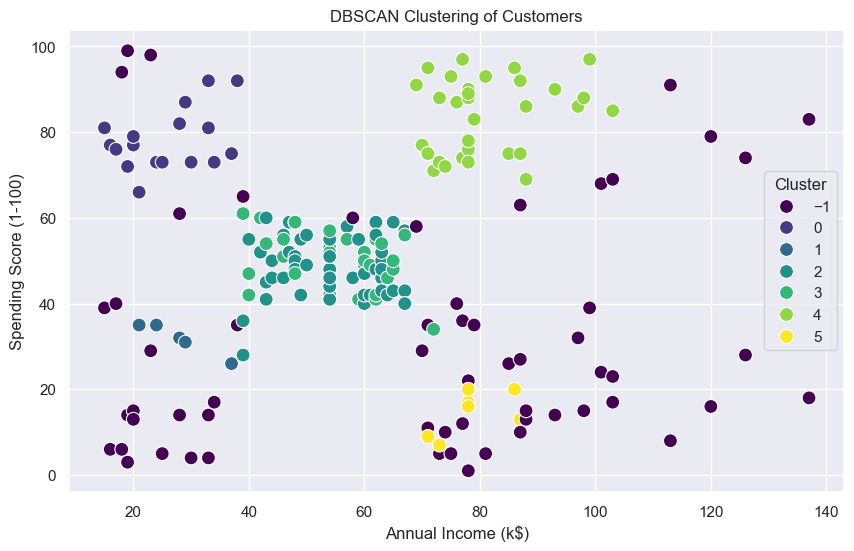

In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Assign labels to DataFrame
customer_data['DBSCAN Cluster'] = dbscan_labels

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN Cluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# T-SNE for Visualization of High-Dimensional Clusters

In [47]:
from sklearn.manifold import TSNE

## Apply T-SNE

c:\Users\snehp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


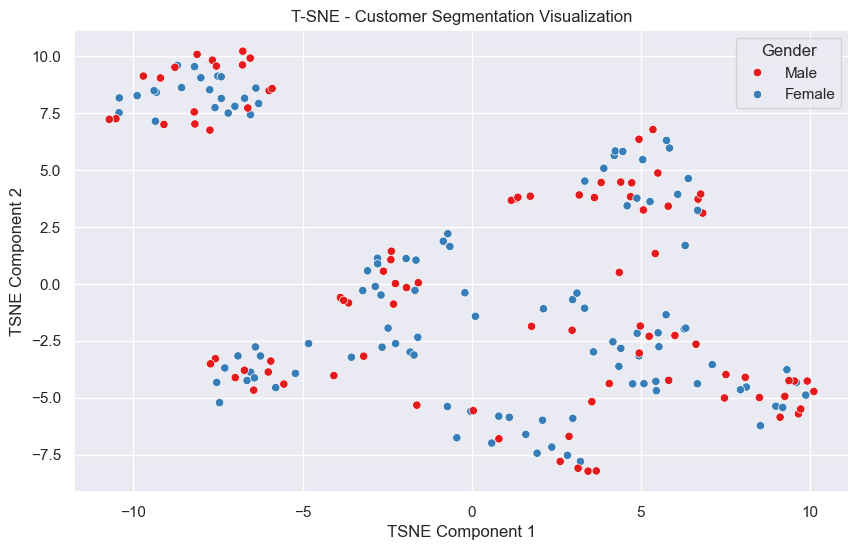

In [49]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

# Create DataFrame with T-SNE components
df_tsne = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])

# Plot the T-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue=customer_data['Gender'], palette='Set1')
plt.title('T-SNE - Customer Segmentation Visualization')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Gender')
plt.show()

# Affinity Propagation for Automatic Clustering

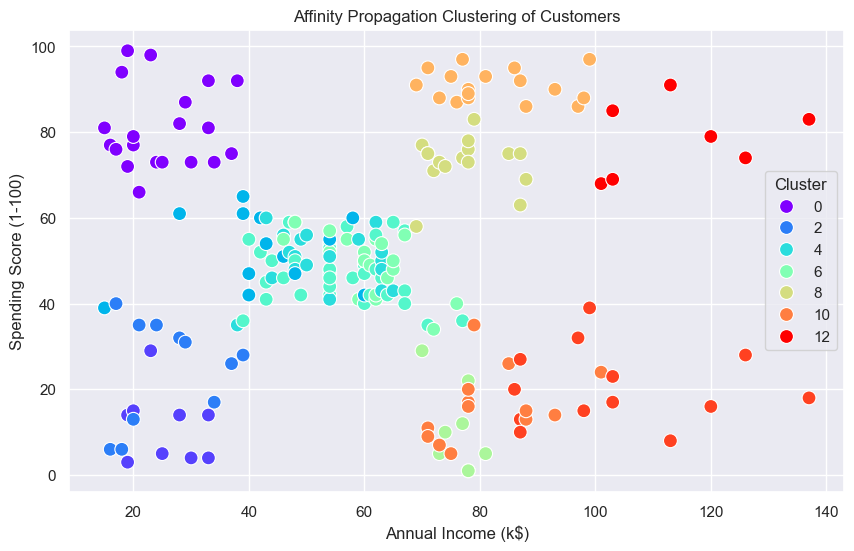

In [51]:
from sklearn.cluster import AffinityPropagation

# Apply Affinity Propagation
affinity = AffinityPropagation(random_state=42)
affinity_labels = affinity.fit_predict(X_scaled)

# Assign labels to DataFrame
customer_data['Affinity Cluster'] = affinity_labels

# Plot Affinity Propagation clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Affinity Cluster', palette='rainbow', s=100)
plt.title('Affinity Propagation Clustering of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Feature Engineering

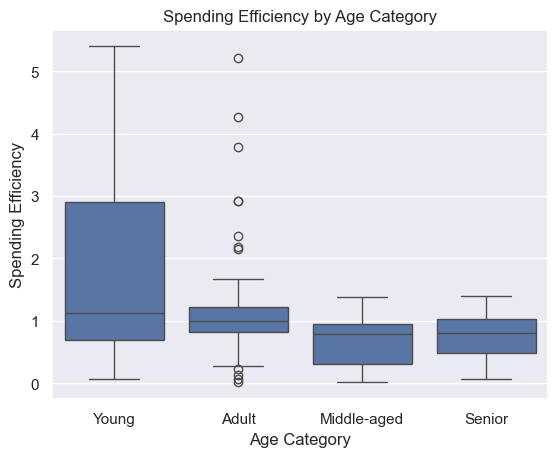

In [53]:
# Creating new features
customer_data['Income per Age'] = customer_data['Annual Income (k$)'] / customer_data['Age']
customer_data['Spending Efficiency'] = customer_data['Spending Score (1-100)'] / customer_data['Annual Income (k$)']

# Example: Binning age and income into categories
customer_data['Age Category'] = pd.cut(customer_data['Age'], bins=[18, 25, 35, 50, 70], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
customer_data['Income Category'] = pd.cut(customer_data['Annual Income (k$)'], bins=[0, 30, 60, 90, 150], labels=['Low', 'Medium', 'High', 'Very High'])

# Visualize the new features
sns.boxplot(x='Age Category', y='Spending Efficiency', data=customer_data)
plt.title('Spending Efficiency by Age Category')
plt.show()

# Customer Profiling and Cluster Interpretation

In [55]:
# Profiling each cluster (example with KMeans clusters)
cluster_profile = customer_data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': lambda x: x.value_counts().idxmax(),
    'Income per Age': 'mean',
    'Spending Efficiency': 'mean'
}).reset_index()

print(cluster_profile)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)  Gender  \
0        0  42.716049           55.296296               49.518519  Female   
1        1  32.692308           86.538462               82.128205  Female   
2        2  25.272727           25.727273               79.363636  Female   
3        3  41.114286           88.200000               17.114286    Male   
4        4  45.217391           26.304348               20.913043  Female   

   Income per Age  Spending Efficiency  
0        1.559827             0.925371  
1        2.685583             0.977464  
2        1.064040             3.368882  
3        2.335911             0.194856  
4        0.612246             0.856403  


# Predictive Modeling for Customer Behavior

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Define target and features

In [58]:
X = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income per Age', 'Spending Efficiency']]
y = customer_data['Cluster']  # Assuming clusters are labeled as target classes

## Split the data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Fit Random Forest Classifier

In [61]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict and evaluate

In [63]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         6
           3       0.87      1.00      0.93        13
           4       1.00      1.00      1.00         5

    accuracy                           0.97        60
   macro avg       0.97      0.99      0.98        60
weighted avg       0.97      0.97      0.97        60

